In [3]:
# import needed packages
import re
import glob
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import nltk
from nltk.tokenize import TweetTokenizer 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader  import SentimentIntensityAnalyzer 

import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from wordcloud import WordCloud, STOPWORDS

import time
from datetime import date
from datetime import datetime

# downloads to be uncommented for the first time
#nltk.download('vader_lexicon')
#nltk.download('wordnet')


C:\Users\dipik\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [6]:
input_dataset = pd.read_csv('applenews.csv',error_bad_lines=False, encoding = 'UTF=8')
input_dataset.head()

,id,headline,date,snippet,type,url,word_count,locations,subjects
0,5c14d0aa00a1bc2872e98e4e,b'Apple Computers Used to Be Built in the U.S....,2018-12-15,b'Steve Jobs tried to create a manufacturing c...,News,https://www.nytimes.com/2018/12/15/business/ap...,1126,['Silicon Valley (Calif)'],"['Factories and Manufacturing', 'Computers and..."
1,5bed9a5b9fb2bb0001ad0a73,b'',2018-11-05,"b'This striking tart is all about the apples, ...",Recipe,https://cooking.nytimes.com/recipes/1019729-ro...,666,[],[]
2,5c142fdb00a1bc2872e98dac,b'Apple Will Update iPhones in China to Avoid ...,2018-12-14,b'The company said it would update the softwar...,News,https://www.nytimes.com/2018/12/14/technology/...,363,['China'],"['Software', 'iPhone', 'Inventions and Patents']"
3,5c0e8f3e00a1bc2872e97f99,b'Chinese Court Says Apple Infringed on Qualco...,2018-12-10,b'The decision is the latest turn in a broad l...,News,https://www.nytimes.com/2018/12/10/technology/...,947,['China'],"['Inventions and Patents', 'Smartphones', 'Sui..."
4,5bbcd9e29fb2bb0001ad0a08,b'',2018-10-08,b'A galette is the perfect dessert for anyone ...,Recipe,https://cooking.nytimes.com/recipes/1019650-ap...,359,[],[]


In [7]:
selecttype = ['News','Op-Ed','briefing','Review','Audio Podcast','Interactive Feature','Correction','List']
select_dataset = input_dataset[input_dataset.type.isin(selecttype)]
select_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 499
Data columns (total 9 columns):
id            464 non-null object
headline      464 non-null object
date          464 non-null object
snippet       464 non-null object
type          464 non-null object
url           464 non-null object
word_count    464 non-null int64
locations     464 non-null object
subjects      464 non-null object
dtypes: int64(1), object(8)
memory usage: 36.2+ KB


In [8]:
#Remove punctuations, digits; remove double spaces and short words
select_dataset['cleantext'] = select_dataset['headline'].apply(lambda x: re.sub('[#$@:)!/&.,?;0-9]', '', str(x)))
select_dataset['cleantext'] = select_dataset['cleantext'].apply(lambda x: re.sub('  ', ' ', str(x)))
select_dataset['cleantext'] = select_dataset['cleantext'].apply(lambda x: re.sub('\'', ' ', str(x)))
select_dataset['cleantext'] = select_dataset['cleantext'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
select_dataset.head()


C:\Users\dipik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\dipik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\dipik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

,id,headline,date,snippet,type,url,word_count,locations,subjects,cleantext
0,5c14d0aa00a1bc2872e98e4e,b'Apple Computers Used to Be Built in the U.S....,2018-12-15,b'Steve Jobs tried to create a manufacturing c...,News,https://www.nytimes.com/2018/12/15/business/ap...,1126,['Silicon Valley (Calif)'],"['Factories and Manufacturing', 'Computers and...",Apple Computers Used Built the Was Mess
2,5c142fdb00a1bc2872e98dac,b'Apple Will Update iPhones in China to Avoid ...,2018-12-14,b'The company said it would update the softwar...,News,https://www.nytimes.com/2018/12/14/technology/...,363,['China'],"['Software', 'iPhone', 'Inventions and Patents']",Apple Will Update iPhones China Avoid Ban Sales
3,5c0e8f3e00a1bc2872e97f99,b'Chinese Court Says Apple Infringed on Qualco...,2018-12-10,b'The decision is the latest turn in a broad l...,News,https://www.nytimes.com/2018/12/10/technology/...,947,['China'],"['Inventions and Patents', 'Smartphones', 'Sui...",Chinese Court Says Apple Infringed Qualcomm Pa...
5,5c10ea3800a1bc2872e9852c,b'You Should Have the Right to Sue Apple',2018-12-12,"b'In Apple v. Pepper, the Supreme Court will d...",Op-Ed,https://www.nytimes.com/2018/12/12/opinion/app...,887,"['United States', 'Illinois']","['Antitrust Laws and Competition Issues', 'iPh...",You Should Have the Right Sue Apple
7,5c17210900a1bc2872e990bf,b'Foxconn Not in Settlement Talks With Qualcom...,2018-12-17,b'The lead attorney for the group of Apple Inc...,News,https://www.nytimes.com/reuters/2018/12/16/bus...,519,[],[],Foxconn Not Settlement Talks With Qualcomm App...


In [9]:
#Conver the text to lower case and tokenise it.
select_dataset['cleantext'] = select_dataset['cleantext'].apply(lambda x: x.lower())
select_dataset['tokens'] = select_dataset['cleantext'].apply(TweetTokenizer().tokenize) 
select_dataset.head()

C:\Users\dipik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\dipik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,id,headline,date,snippet,type,url,word_count,locations,subjects,cleantext,tokens
0,5c14d0aa00a1bc2872e98e4e,b'Apple Computers Used to Be Built in the U.S....,2018-12-15,b'Steve Jobs tried to create a manufacturing c...,News,https://www.nytimes.com/2018/12/15/business/ap...,1126,['Silicon Valley (Calif)'],"['Factories and Manufacturing', 'Computers and...",apple computers used built the was mess,"[apple, computers, used, built, the, was, mess]"
2,5c142fdb00a1bc2872e98dac,b'Apple Will Update iPhones in China to Avoid ...,2018-12-14,b'The company said it would update the softwar...,News,https://www.nytimes.com/2018/12/14/technology/...,363,['China'],"['Software', 'iPhone', 'Inventions and Patents']",apple will update iphones china avoid ban sales,"[apple, will, update, iphones, china, avoid, b..."
3,5c0e8f3e00a1bc2872e97f99,b'Chinese Court Says Apple Infringed on Qualco...,2018-12-10,b'The decision is the latest turn in a broad l...,News,https://www.nytimes.com/2018/12/10/technology/...,947,['China'],"['Inventions and Patents', 'Smartphones', 'Sui...",chinese court says apple infringed qualcomm pa...,"[chinese, court, says, apple, infringed, qualc..."
5,5c10ea3800a1bc2872e9852c,b'You Should Have the Right to Sue Apple',2018-12-12,"b'In Apple v. Pepper, the Supreme Court will d...",Op-Ed,https://www.nytimes.com/2018/12/12/opinion/app...,887,"['United States', 'Illinois']","['Antitrust Laws and Competition Issues', 'iPh...",you should have the right sue apple,"[you, should, have, the, right, sue, apple]"
7,5c17210900a1bc2872e990bf,b'Foxconn Not in Settlement Talks With Qualcom...,2018-12-17,b'The lead attorney for the group of Apple Inc...,News,https://www.nytimes.com/reuters/2018/12/16/bus...,519,[],[],foxconn not settlement talks with qualcomm app...,"[foxconn, not, settlement, talks, with, qualco..."


In [10]:
#Remove the stop words: 
nltk.download('stopwords')
stopwords_vocabulary = stopwords.words('english')
select_dataset['cleantoken'] = select_dataset['tokens'].apply(lambda x: [i for i in x if i.lower() not in stopwords_vocabulary])
select_dataset.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dipik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\dipik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,id,headline,date,snippet,type,url,word_count,locations,subjects,cleantext,tokens,cleantoken
0,5c14d0aa00a1bc2872e98e4e,b'Apple Computers Used to Be Built in the U.S....,2018-12-15,b'Steve Jobs tried to create a manufacturing c...,News,https://www.nytimes.com/2018/12/15/business/ap...,1126,['Silicon Valley (Calif)'],"['Factories and Manufacturing', 'Computers and...",apple computers used built the was mess,"[apple, computers, used, built, the, was, mess]","[apple, computers, used, built, mess]"
2,5c142fdb00a1bc2872e98dac,b'Apple Will Update iPhones in China to Avoid ...,2018-12-14,b'The company said it would update the softwar...,News,https://www.nytimes.com/2018/12/14/technology/...,363,['China'],"['Software', 'iPhone', 'Inventions and Patents']",apple will update iphones china avoid ban sales,"[apple, will, update, iphones, china, avoid, b...","[apple, update, iphones, china, avoid, ban, sa..."
3,5c0e8f3e00a1bc2872e97f99,b'Chinese Court Says Apple Infringed on Qualco...,2018-12-10,b'The decision is the latest turn in a broad l...,News,https://www.nytimes.com/2018/12/10/technology/...,947,['China'],"['Inventions and Patents', 'Smartphones', 'Sui...",chinese court says apple infringed qualcomm pa...,"[chinese, court, says, apple, infringed, qualc...","[chinese, court, says, apple, infringed, qualc..."
5,5c10ea3800a1bc2872e9852c,b'You Should Have the Right to Sue Apple',2018-12-12,"b'In Apple v. Pepper, the Supreme Court will d...",Op-Ed,https://www.nytimes.com/2018/12/12/opinion/app...,887,"['United States', 'Illinois']","['Antitrust Laws and Competition Issues', 'iPh...",you should have the right sue apple,"[you, should, have, the, right, sue, apple]","[right, sue, apple]"
7,5c17210900a1bc2872e990bf,b'Foxconn Not in Settlement Talks With Qualcom...,2018-12-17,b'The lead attorney for the group of Apple Inc...,News,https://www.nytimes.com/reuters/2018/12/16/bus...,519,[],[],foxconn not settlement talks with qualcomm app...,"[foxconn, not, settlement, talks, with, qualco...","[foxconn, settlement, talks, qualcomm, apple, ..."


In [11]:
#lemmatisation
select_dataset['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in select_dataset['cleantext']]
select_dataset.head()

C:\Users\dipik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,id,headline,date,snippet,type,url,word_count,locations,subjects,cleantext,tokens,cleantoken,text_lem
0,5c14d0aa00a1bc2872e98e4e,b'Apple Computers Used to Be Built in the U.S....,2018-12-15,b'Steve Jobs tried to create a manufacturing c...,News,https://www.nytimes.com/2018/12/15/business/ap...,1126,['Silicon Valley (Calif)'],"['Factories and Manufacturing', 'Computers and...",apple computers used built the was mess,"[apple, computers, used, built, the, was, mess]","[apple, computers, used, built, mess]",apple computers used built the was mess
2,5c142fdb00a1bc2872e98dac,b'Apple Will Update iPhones in China to Avoid ...,2018-12-14,b'The company said it would update the softwar...,News,https://www.nytimes.com/2018/12/14/technology/...,363,['China'],"['Software', 'iPhone', 'Inventions and Patents']",apple will update iphones china avoid ban sales,"[apple, will, update, iphones, china, avoid, b...","[apple, update, iphones, china, avoid, ban, sa...",apple will update iphones china avoid ban sales
3,5c0e8f3e00a1bc2872e97f99,b'Chinese Court Says Apple Infringed on Qualco...,2018-12-10,b'The decision is the latest turn in a broad l...,News,https://www.nytimes.com/2018/12/10/technology/...,947,['China'],"['Inventions and Patents', 'Smartphones', 'Sui...",chinese court says apple infringed qualcomm pa...,"[chinese, court, says, apple, infringed, qualc...","[chinese, court, says, apple, infringed, qualc...",chinese court says apple infringed qualcomm pa...
5,5c10ea3800a1bc2872e9852c,b'You Should Have the Right to Sue Apple',2018-12-12,"b'In Apple v. Pepper, the Supreme Court will d...",Op-Ed,https://www.nytimes.com/2018/12/12/opinion/app...,887,"['United States', 'Illinois']","['Antitrust Laws and Competition Issues', 'iPh...",you should have the right sue apple,"[you, should, have, the, right, sue, apple]","[right, sue, apple]",you should have the right sue apple
7,5c17210900a1bc2872e990bf,b'Foxconn Not in Settlement Talks With Qualcom...,2018-12-17,b'The lead attorney for the group of Apple Inc...,News,https://www.nytimes.com/reuters/2018/12/16/bus...,519,[],[],foxconn not settlement talks with qualcomm app...,"[foxconn, not, settlement, talks, with, qualco...","[foxconn, settlement, talks, qualcomm, apple, ...",foxconn not settlement talks with qualcomm app...


In [12]:
#Sentiment Analysis using Vader
sent = SentimentIntensityAnalyzer()

select_dataset['compound']=select_dataset.text_lem.apply(lambda x:sent.polarity_scores(x)['compound'])
select_dataset['neutral']=select_dataset.text_lem.apply(lambda x:sent.polarity_scores(x)['neu'])
select_dataset['negative']=select_dataset.text_lem.apply(lambda x:sent.polarity_scores(x)['neg'])
select_dataset['positive']=select_dataset.text_lem.apply(lambda x:sent.polarity_scores(x)['pos'])

#Classifying the sentiment type based on the compound sentiment score
select_dataset['sentiment_type']=''
select_dataset.loc[select_dataset['compound'] > 0,'sentiment_type']='POSITIVE'
select_dataset.loc[select_dataset['compound'] == 0,'sentiment_type']='NEUTRAL'
select_dataset.loc[select_dataset['compound'] < 0,'sentiment_type']='NEGATIVE'
select_dataset.head()

C:\Users\dipik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\dipik\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\dipik\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

,id,headline,date,snippet,type,url,word_count,locations,subjects,cleantext,tokens,cleantoken,text_lem,compound,neutral,negative,positive,sentiment_type
0,5c14d0aa00a1bc2872e98e4e,b'Apple Computers Used to Be Built in the U.S....,2018-12-15,b'Steve Jobs tried to create a manufacturing c...,News,https://www.nytimes.com/2018/12/15/business/ap...,1126,['Silicon Valley (Calif)'],"['Factories and Manufacturing', 'Computers and...",apple computers used built the was mess,"[apple, computers, used, built, the, was, mess]","[apple, computers, used, built, mess]",apple computers used built the was mess,-0.3612,0.706,0.294,0.0,NEGATIVE
2,5c142fdb00a1bc2872e98dac,b'Apple Will Update iPhones in China to Avoid ...,2018-12-14,b'The company said it would update the softwar...,News,https://www.nytimes.com/2018/12/14/technology/...,363,['China'],"['Software', 'iPhone', 'Inventions and Patents']",apple will update iphones china avoid ban sales,"[apple, will, update, iphones, china, avoid, b...","[apple, update, iphones, china, avoid, ban, sa...",apple will update iphones china avoid ban sales,-0.7003,0.508,0.492,0.0,NEGATIVE
3,5c0e8f3e00a1bc2872e97f99,b'Chinese Court Says Apple Infringed on Qualco...,2018-12-10,b'The decision is the latest turn in a broad l...,News,https://www.nytimes.com/2018/12/10/technology/...,947,['China'],"['Inventions and Patents', 'Smartphones', 'Sui...",chinese court says apple infringed qualcomm pa...,"[chinese, court, says, apple, infringed, qualc...","[chinese, court, says, apple, infringed, qualc...",chinese court says apple infringed qualcomm pa...,0.0000,1.000,0.000,0.0,NEUTRAL
5,5c10ea3800a1bc2872e9852c,b'You Should Have the Right to Sue Apple',2018-12-12,"b'In Apple v. Pepper, the Supreme Court will d...",Op-Ed,https://www.nytimes.com/2018/12/12/opinion/app...,887,"['United States', 'Illinois']","['Antitrust Laws and Competition Issues', 'iPh...",you should have the right sue apple,"[you, should, have, the, right, sue, apple]","[right, sue, apple]",you should have the right sue apple,0.0000,1.000,0.000,0.0,NEUTRAL
7,5c17210900a1bc2872e990bf,b'Foxconn Not in Settlement Talks With Qualcom...,2018-12-17,b'The lead attorney for the group of Apple Inc...,News,https://www.nytimes.com/reuters/2018/12/16/bus...,519,[],[],foxconn not settlement talks with qualcomm app...,"[foxconn, not, settlement, talks, with, qualco...","[foxconn, settlement, talks, qualcomm, apple, ...",foxconn not settlement talks with qualcomm app...,-0.3818,0.755,0.245,0.0,NEGATIVE


In [13]:
print(select_dataset['sentiment_type'].value_counts())
select_dataset.info()

NEUTRAL     240
NEGATIVE    123
POSITIVE    101
Name: sentiment_type, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 499
Data columns (total 18 columns):
id                464 non-null object
headline          464 non-null object
date              464 non-null object
snippet           464 non-null object
type              464 non-null object
url               464 non-null object
word_count        464 non-null int64
locations         464 non-null object
subjects          464 non-null object
cleantext         464 non-null object
tokens            464 non-null object
cleantoken        464 non-null object
text_lem          464 non-null object
compound          464 non-null float64
neutral           464 non-null float64
negative          464 non-null float64
positive          464 non-null float64
sentiment_type    464 non-null object
dtypes: float64(4), int64(1), object(13)
memory usage: 68.9+ KB


In [14]:
#Write into a dataset 
select_dataset.to_csv('AppleAllNews.csv', encoding='utf-8')
compound_summary = select_dataset.describe()
print(compound_summary)

        word_count    compound     neutral    negative    positive
count   464.000000  464.000000  464.000000  464.000000  464.000000
mean    686.006466   -0.031559    0.832034    0.096226    0.071741
std     482.920066    0.313414    0.195665    0.166053    0.137346
min       0.000000   -0.883400    0.213000    0.000000    0.000000
25%     298.750000   -0.153525    0.684000    0.000000    0.000000
50%     549.000000    0.000000    1.000000    0.000000    0.000000
75%    1029.750000    0.000000    1.000000    0.208750    0.000000
max    3189.000000    0.790600    1.000000    0.787000    0.700000


In [15]:
positive_news = select_dataset[select_dataset['compound'] > 0]
positive_news.to_csv('ApplePosTwts.csv', encoding='utf-8')
positive_summary = positive_news.describe()
print(positive_summary)


        word_count    compound     neutral    negative    positive
count   101.000000  101.000000  101.000000  101.000000  101.000000
mean    731.841584    0.389243    0.683307    0.015545    0.301158
std     486.884252    0.171986    0.127729    0.054937    0.115933
min       0.000000    0.025800    0.270000    0.000000    0.124000
25%     323.000000    0.250000    0.612000    0.000000    0.222000
50%     683.000000    0.381800    0.719000    0.000000    0.268000
75%    1045.000000    0.510600    0.777000    0.000000    0.365000
max    2061.000000    0.790600    0.876000    0.306000    0.700000


In [16]:
    negative_news = select_dataset[select_dataset['compound'] < 0]
    negative_news.to_csv('AppleNegTwts.csv', encoding='utf-8')
    negative_summary = negative_news.describe()
    print(negative_summary)


        word_count    compound     neutral    negative    positive
count   123.000000  123.000000  123.000000  123.000000  123.000000
mean    662.000000   -0.438675    0.635000    0.345951    0.019057
std     444.180568    0.181337    0.131441    0.123999    0.059581
min     112.000000   -0.883400    0.213000    0.116000    0.000000
25%     297.500000   -0.571900    0.559000    0.259000    0.000000
50%     496.000000   -0.421500    0.659000    0.320000    0.000000
75%    1036.500000   -0.296000    0.732000    0.394000    0.000000
max    1976.000000   -0.051600    0.884000    0.787000    0.277000


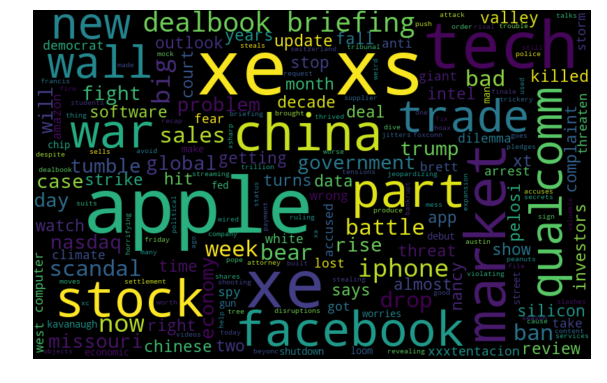

In [17]:
#Wordcloud for the negative words
neg_words = ' '.join([text for text in select_dataset['cleantext'][select_dataset['compound'] < 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

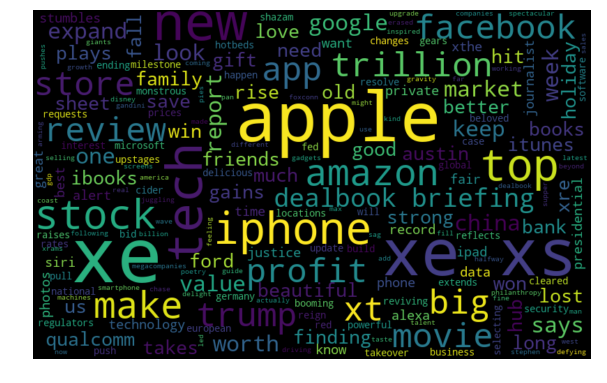

In [18]:
#wordcloud for the positive words
pos_words = ' '.join([text for text in select_dataset['cleantext'][select_dataset['compound'] > 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()